# In this notebook we will cover : project based on whether a person visits a website and whether he / she buys a product or not.

* Hypothesis for classification
* logistic Regression
* Cost for classification
* Accuracy

# Cost function in logistic function is not of covex shape so, we use sigmoid function and cost function is given as:

# ci = - (1-yi) log(1-yi_hat) - yi log(yi_hat)

# OR 

**ci = -log(1-yi_hat)      for yi =0**

**ci = - log(yi_hat)       for yi =1** 


where ** y_hat ** is described as
  
  # y_hat = f(b + X * w)

In [6]:
# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('user_visit_duration.csv')

In [8]:
# Exploring Data

In [5]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Time (min)    100 non-null float64
Buy           100 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [10]:
df.describe()

,Time (min),Buy
count,100.000000,100.000000
mean,1.849000,0.500000
std,1.073868,0.502519
min,0.000000,0.000000
25%,1.066667,0.000000
50%,1.858333,0.500000
75%,2.687500,1.000000
max,4.150000,1.000000


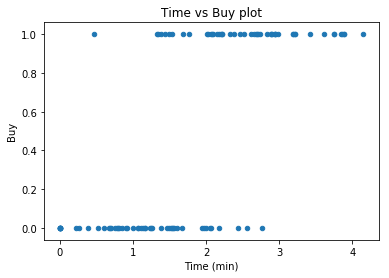

In [11]:
# VISUALIZING DATA

df.plot(kind = 'scatter', x = 'Time (min)',y = 'Buy' , title ='Time vs Buy plot')

In [12]:
from keras.models import Sequential  # sequential because we will be adding elements to this model in a sequence. 
from keras.layers import Dense       
from keras.optimizers import Adam, SGD # helps to change the values of w and b to get to the minimum cost.

Using TensorFlow backend.


In [13]:
model = Sequential()

In [14]:
model.add(Dense(1, input_shape=(1,), activation = 'sigmoid'))

In [16]:
model.compile(SGD(lr = 0.5), 'binary_crossentropy', metrics =['accuracy'])

# here, loss(cost_function) is binary_crossentropy

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
X = df[['Time (min)']].values

In [21]:
y = df[['Buy']].values

In [23]:
model.fit(X, y ,epochs = 25)  # applying iterations

# we see that loss is going down while accuracy is going up

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 0.6210 - acc: 0.5900
Epoch 2/25
100/100 [==============================] - 0s 120us/step - loss: 0.5856 - acc: 0.6300
Epoch 3/25
100/100 [==============================] - 0s 120us/step - loss: 0.5685 - acc: 0.6700
Epoch 4/25
100/100 [==============================] - 0s 80us/step - loss: 0.5531 - acc: 0.7000
Epoch 5/25
100/100 [==============================] - 0s 90us/step - loss: 0.5374 - acc: 0.8100
Epoch 6/25
100/100 [==============================] - 0s 80us/step - loss: 0.5081 - acc: 0.7400
Epoch 7/25
100/100 [==============================] - 0s 90us/step - loss: 0.4897 - acc: 0.8100
Epoch 8/25
100/100 [==============================] - 0s 80us/step - loss: 0.5041 - acc: 0.8000
Epoch 9/25
100/100 [==============================] - 0s 70us/step - loss: 0.4705 - acc: 0.8000
Epoch 10/25
100/100 [==============================] - 0s 80us/step - loss: 0.4745 - acc: 0.7800
Epoch 11/25
100/100 [=================

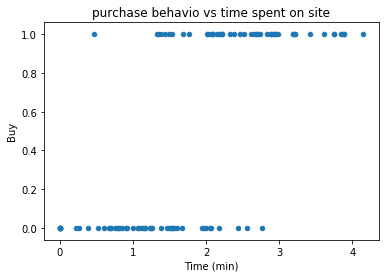

In [25]:
ax = df.plot(kind = 'scatter', x ='Time (min)',y = 'Buy',title = 'purchase behavior vs time spent on site')

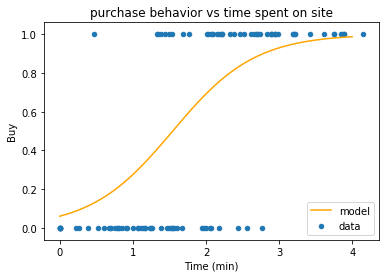

In [28]:
ax = df.plot(kind = 'scatter', x ='Time (min)',y = 'Buy',title = 'purchase behavior vs time spent on site')

temp = np.linspace(0,4)
ax.plot(temp, model.predict(temp), color = 'orange')
plt.legend(['model','data'])

In [29]:
# predicting classes i.e class 0 or class 1

temp_class =model.predict(temp) > 0.5

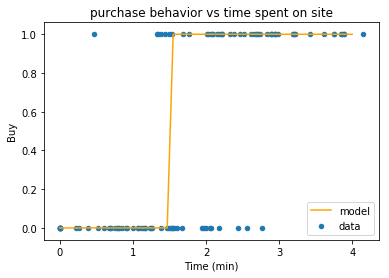

In [31]:
ax = df.plot(kind = 'scatter', x ='Time (min)',y = 'Buy',title = 'purchase behavior vs time spent on site')

temp = np.linspace(0,4)
ax.plot(temp,temp_class, color = 'orange')
plt.legend(['model','data'])

In [32]:
# checking accuracy of model

y_pred = model.predict(X)
y_class_pred = y_pred >0.5


In [33]:
from sklearn.metrics import accuracy_score

In [35]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.800


# Train/Test split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
# Resetting Weights

params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [39]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [40]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [41]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.787
The test accuracy score is 0.800
